In [9]:
import sys
from pathlib import Path

# Add src/ to sys.path
project_root = Path().resolve().parent  # assumes you're in notebooks/
src_path = project_root / "src"
sys.path.append(str(src_path))

In [10]:
from pathlib import Path

import pandas as pd

project_root = Path().resolve().parent
data_path = project_root / "data" / "processed" / "features_accel.csv"

df = pd.read_csv(data_path)

In [18]:
# Feature columns = all except labels and metadata
X = df.drop(
    columns=[
        "activity",
        "sensor",
        "user",
        "timestamp",
        "source_file",
        "row_id",
        "start_idx",
        "start_time",
    ],
    errors="ignore",
)
y = df["activity"]

print(X.shape)
print(y.value_counts())

(1183, 57)
activity
eat_chips           248
watch_tv            168
mop_floor           157
sweep               157
type_on_keyboard    157
brush_teeth         153
wash_hands          143
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [20]:
X.columns

Index(['x_mean', 'x_std', 'x_mad', 'x_iqr', 'x_min', 'x_max', 'x_energy',
       'x_jerk_mean', 'x_jerk_std', 'x_zcr', 'x_spectral_entropy',
       'x_dominant_freq', 'x_spectral_centroid', 'x_entropy', 'y_mean',
       'y_std', 'y_mad', 'y_iqr', 'y_min', 'y_max', 'y_energy', 'y_jerk_mean',
       'y_jerk_std', 'y_zcr', 'y_spectral_entropy', 'y_dominant_freq',
       'y_spectral_centroid', 'y_entropy', 'z_mean', 'z_std', 'z_mad', 'z_iqr',
       'z_min', 'z_max', 'z_energy', 'z_jerk_mean', 'z_jerk_std', 'z_zcr',
       'z_spectral_entropy', 'z_dominant_freq', 'z_spectral_centroid',
       'z_entropy', 'corr_xy', 'corr_yz', 'corr_xz', 'mag_mean', 'mag_std',
       'mag_mad', 'mag_iqr', 'mag_energy', 'mag_jerk_mean', 'mag_jerk_std',
       'sma', 'mag_spectral_entropy', 'mag_dominant_freq',
       'mag_spectral_centroid', 'mag_zcr'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define ML pipeline
acc_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ]
)

# Train
acc_pipeline.fit(X_acc_train, y_acc_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


Audio-Only Model Performance:

                  precision    recall  f1-score   support

     brush_teeth       0.93      0.90      0.92        31
       eat_chips       0.94      0.96      0.95        50
       mop_floor       0.81      0.84      0.83        31
           sweep       0.78      0.81      0.79        31
type_on_keyboard       1.00      0.94      0.97        31
      wash_hands       0.90      0.90      0.90        29
        watch_tv       0.97      0.97      0.97        34

        accuracy                           0.91       237
       macro avg       0.91      0.90      0.90       237
    weighted avg       0.91      0.91      0.91       237



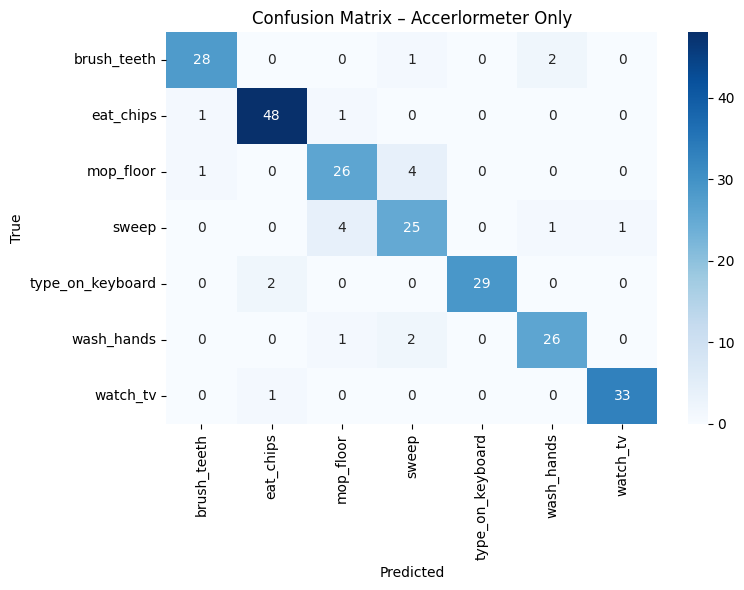

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_acc_pred = acc_pipeline.predict(X_acc_test)

# Metrics
print("Audio-Only Model Performance:\n")
print(classification_report(y_acc_test, y_acc_pred))

# Confusion Matrix
cm = confusion_matrix(y_acc_test, y_acc_pred, labels=acc_pipeline.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=acc_pipeline.classes_,
    yticklabels=acc_pipeline.classes_,
    cmap="Blues",
)
plt.title("Confusion Matrix – Accerlormeter Only")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [8]:
from wearable_htad.evaluation.metrics import evaluate_model

# After predicting:
result_acc = evaluate_model(y_acc_test, y_acc_pred, name="Acc Model")
result_df = pd.DataFrame([evaluate_model(y_acc_test, y_acc_pred, name="Acc Model")])
result_df.to_csv(Path("outputs/acc_metrics.csv"), index=False)